In [1]:
import numpy as np
from scipy.stats import gamma, binom, norm
import matplotlib as mlp
import matplotlib.pyplot as plt

mlp.rcParams['font.family'] = 'serif'
mlp.rcParams['font.size'] = 16

n = 10      - cdf = 0.542070
n = 100     - cdf = 0.513299
n = 1000    - cdf = 0.504205
n = 10000   - cdf = 0.501330
n = 100000  - cdf = 0.500421
n = 1000000 - cdf = 0.500133


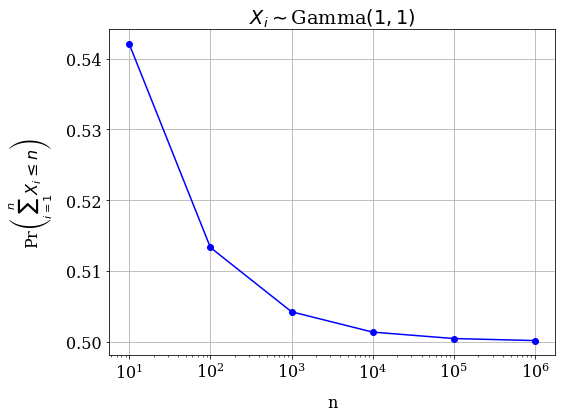

In [2]:
# Problem 3.1(a)

ns = (10, 100, 1_000, 10_000, 100_000, 1_000_000)
xs, ys = list(), list()

for n in ns:
    cdf = gamma.cdf(n, n, scale=1)
    print(f'n = {str(n).ljust(len(str(max(ns))), " ")} - cdf = {cdf:.6f}')
    xs.append(n); ys.append(cdf)

plt.figure(figsize=(8,6))
plt.plot(xs, ys, color='b', marker='o')
plt.title(r'$X_i \sim$' + 'Gamma' + '$(1, 1)$')
plt.xlabel('n', labelpad=12)
plt.ylabel(r'Pr$\left( \sum_{i=1}^n X_i \leq n \right)$', labelpad=12)
plt.xscale('log')
plt.grid()
plt.show()

n = 10      - cdf = 0.623047
n = 100     - cdf = 0.539795
n = 1000    - cdf = 0.636014
n = 10000   - cdf = 0.843752
n = 100000  - cdf = 0.999226
n = 1000000 - cdf = 1.000000


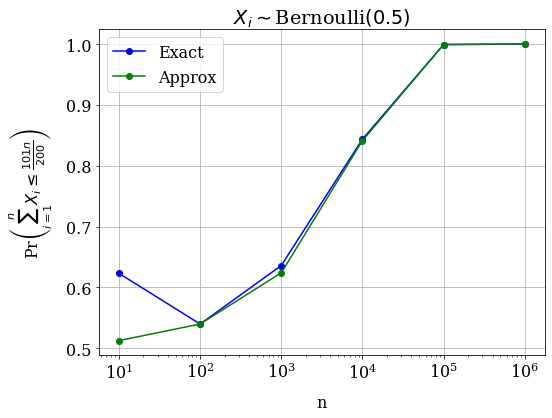

In [3]:
# Problem 3.1(b)

ns = (10, 100, 1_000, 10_000, 100_000, 1_000_000)
xs, exact_ys, approx_ys = list(), list(), list()

for n in ns:
    cdf = binom.cdf(101*n/200, n, 0.5)
    print(f'n = {str(n).ljust(len(str(max(ns))), " ")} - cdf = {cdf:.6f}')
    xs.append(n); exact_ys.append(cdf); approx_ys.append(norm.cdf(n**0.5 / 100))

plt.figure(figsize=(8,6))
plt.plot(xs, exact_ys,  color='b', marker='o', label='Exact')
plt.plot(xs, approx_ys, color='g', marker='o', label='Approx')
plt.title(r'$X_i \sim$' + 'Bernoulli' + r'$(0.5)$')
plt.xlabel('n', labelpad=12)
plt.ylabel(r'Pr$\left( \sum_{i=1}^n X_i \leq \frac{101n}{200} \right)$', labelpad=12)
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

In [4]:
# Problem 3.3(b)

data = [
    15.4, 71.4, 13.8, 16.4, 56.9, 18.7, 83.6, 83.6, 75.0, 23.5,
    69.4, 56.7, 97.6, 68.4, 82.0, 50.8, 48.9, 84.3, 17.5, 22.0,
    25.6, 45.2, 84.8, 82.3, 15.4, 45.9, 57.4, 47.5, 69.1, 66.5,
]

S_1 = np.mean(data)
S_2 = np.mean(np.square(data))

a_hat = S_1 - (3*(S_2-S_1**2))**0.5
b_hat = S_1 + (3*(S_2-S_1**2))**0.5

print(f'a_hat = {round(a_hat, 6)}\nb_hat = {round(b_hat, 6)}')

a_hat = 8.180806
b_hat = 98.192527


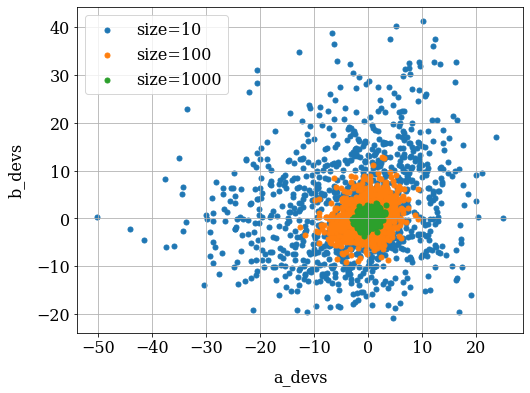

In [5]:
# We observe that, for random samples from Unif(10,100), the estimates are more
# concentred around the parameters for a larger sample size

a, b = 10, 100
sizes = (10, 100, 1_000)
n_samples = 1_000

plt.figure(figsize=(8,6))

for i, size in enumerate(sizes):
    a_devs, b_devs = list(), list()
    for _ in range(n_samples):
        sample = np.random.uniform(a, b, size)
        S_1 = np.mean(sample); S_2 = np.mean(np.square(sample))
        a_hat = S_1 - (3*(S_2-S_1**2))**0.5; b_hat = S_1 + (3*(S_2-S_1**2))**0.5
        a_devs.append(a-a_hat); b_devs.append(b-b_hat)
    plt.scatter(a_devs, b_devs, s=25, label=f'size={size}')

plt.xlabel('a_devs', labelpad=12)
plt.ylabel('b_devs', labelpad=12)
plt.grid()
plt.legend()
plt.show()